In [15]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf


In [5]:
df_covid = pd.read_csv('./Covid_clean.csv')

In [6]:
#dropeamos lo que no me sirve como final clasification

df_covid.drop(['USMER', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL', 'DATE_DIED', 'PATIENT_TYPE'], axis=1, inplace=True)

In [7]:
# reemplazo los valores 2 por 0 en todo el dataset

df_covid.replace(2, 0, inplace=True)

df_covid.head()

,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,fallecidos
0,1,1.0,65.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1.0,72.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
2,0,0.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,0.0,68.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
df_covid = pd.read_csv('./Covid_clean_modelo.csv')

In [9]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024829 entries, 0 to 1024828
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   SEX             1024829 non-null  int64  
 1   PNEUMONIA       1024829 non-null  float64
 2   AGE             1024829 non-null  float64
 3   DIABETES        1024829 non-null  float64
 4   COPD            1024829 non-null  float64
 5   ASTHMA          1024829 non-null  float64
 6   INMSUPR         1024829 non-null  float64
 7   HIPERTENSION    1024829 non-null  float64
 8   OTHER_DISEASE   1024829 non-null  float64
 9   CARDIOVASCULAR  1024829 non-null  float64
 10  OBESITY         1024829 non-null  float64
 11  RENAL_CHRONIC   1024829 non-null  float64
 12  TOBACCO         1024829 non-null  float64
 13  fallecidos      1024829 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 109.5 MB


# comparacion de modelos

## Sin rebalanceo

In [10]:
# creamos el modelo de clasificacion

X = df_covid.drop('fallecidos', axis=1)
y = df_covid['fallecidos']

# dividimos el dataset en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# red neuronal entrenar

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/10
25621/25621 [==============================] - 35s 1ms/step - loss: 0.1595 - accuracy: 0.9324 - val_loss: 0.1566 - val_accuracy: 0.9334
Epoch 2/10
25621/25621 [==============================] - 27s 1ms/step - loss: 0.1576 - accuracy: 0.9328 - val_loss: 0.1570 - val_accuracy: 0.9334
Epoch 3/10
25621/25621 [==============================] - 26s 1ms/step - loss: 0.1574 - accuracy: 0.9329 - val_loss: 0.1570 - val_accuracy: 0.9330
Epoch 4/10
25621/25621 [==============================] - 25s 989us/step - loss: 0.1572 - accuracy: 0.9331 - val_loss: 0.1562 - val_accuracy: 0.9332
Epoch 5/10
25621/25621 [==============================] - 25s 975us/step - loss: 0.1571 - accuracy: 0.9331 - val_loss: 0.1562 - val_accuracy: 0.9336
Epoch 6/10
25621/25621 [==============================] - 26s 1ms/step - loss: 0.1571 - accuracy: 0.9331 - val_loss: 0.1562 - val_accuracy: 0.9334
Epoch 7/10
25621/25621 [==============================] - 27s 1ms/step - loss: 0.1570 - accuracy: 0.9332 - val_los

In [12]:
#evaluamos el modelo

loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Obtener las predicciones del modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

   1/6406 [..............................] - ETA: 2:09 - loss: 0.2098 - accuracy: 0.9062

6406/6406 [==============================] - 4s 668us/step - loss: 0.1565 - accuracy: 0.9330
Loss: 0.1564807891845703
Accuracy: 0.9330279231071472
6406/6406 [==============================] - 4s 584us/step
Precision: 0.5521517140773158
Recall: 0.3597908745247148
F1: 0.43568345323741003


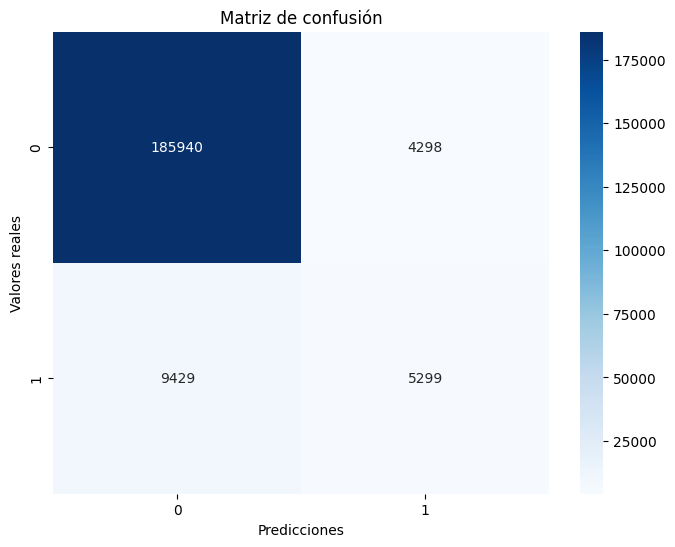

In [13]:


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

# Rebalanceo
## Sobremuestreo SMOTE

In [16]:


# dividimos en clase mayoritaria y minoritaria
clase_mayoritaria = df_covid[df_covid['fallecidos'] == 0]
clase_minoritaria = df_covid[df_covid['fallecidos'] == 1]

# upsampling de la clase minoritaria
smote = SMOTE(random_state=42)
features_balanceados, target_balanceados = smote.fit_resample(df_covid.drop('fallecidos', axis=1), df_covid['fallecidos'])

df_balanceado = pd.concat([pd.DataFrame(features_balanceados), pd.DataFrame(target_balanceados)], axis=1)

df_balanceado['fallecidos'].value_counts()

fallecidos
1    950217
0    950217
Name: count, dtype: int64

In [17]:
# creamos el modelo de clasificacion
X = df_balanceado.drop('fallecidos', axis=1)
y = df_balanceado['fallecidos']

In [18]:
# dividimos el dataset en train y test
X_train, X_test_smote, y_train, y_test_smote = train_test_split(X, y, test_size=0.2, random_state=42)



# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_smote = scaler.transform(X_test_smote)

# red neuronal entrenar
model_smote = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_smote.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test_smote, y_test_smote))


Epoch 1/10
47511/47511 [==============================] - 49s 1ms/step - loss: 0.3388 - accuracy: 0.8596 - val_loss: 0.3323 - val_accuracy: 0.8613
Epoch 2/10
47511/47511 [==============================] - 50s 1ms/step - loss: 0.3297 - accuracy: 0.8627 - val_loss: 0.3280 - val_accuracy: 0.8636
Epoch 3/10
47511/47511 [==============================] - 49s 1ms/step - loss: 0.3269 - accuracy: 0.8639 - val_loss: 0.3247 - val_accuracy: 0.8644
Epoch 4/10
47511/47511 [==============================] - 49s 1ms/step - loss: 0.3248 - accuracy: 0.8646 - val_loss: 0.3234 - val_accuracy: 0.8646
Epoch 5/10
47511/47511 [==============================] - 50s 1ms/step - loss: 0.3231 - accuracy: 0.8652 - val_loss: 0.3218 - val_accuracy: 0.8655
Epoch 6/10
47511/47511 [==============================] - 51s 1ms/step - loss: 0.3220 - accuracy: 0.8658 - val_loss: 0.3241 - val_accuracy: 0.8652
Epoch 7/10
47511/47511 [==============================] - 53s 1ms/step - loss: 0.3215 - accuracy: 0.8661 - val_loss: 0

In [19]:
#evaluamos el modelo
loss_smote, accuracy_smote = model_smote.evaluate(X_test_smote, y_test_smote)
print('Loss:', loss_smote)
print('Accuracy:', accuracy_smote)

# Obtener las predicciones del modelo
y_pred_smote = model_smote.predict(X_test_smote)
y_pred_smote = (y_pred_smote > 0.5).astype(int)

precision_smote = precision_score(y_test_smote, y_pred_smote)
recall_smote = recall_score(y_test_smote, y_pred_smote)
f1_smote = f1_score(y_test_smote, y_pred_smote)

print('Precision:', precision_smote)
print('Recall:', recall_smote)
print('F1:', f1_smote)




    1/11878 [..............................] - ETA: 5:05 - loss: 0.5408 - accuracy: 0.7812

11878/11878 [==============================] - 8s 678us/step - loss: 0.3202 - accuracy: 0.8669
Loss: 0.3201780319213867
Accuracy: 0.8668646812438965
11878/11878 [==============================] - 7s 590us/step
Precision: 0.8615885004642766
Recall: 0.8741079510767741
F1: 0.8678030748331309


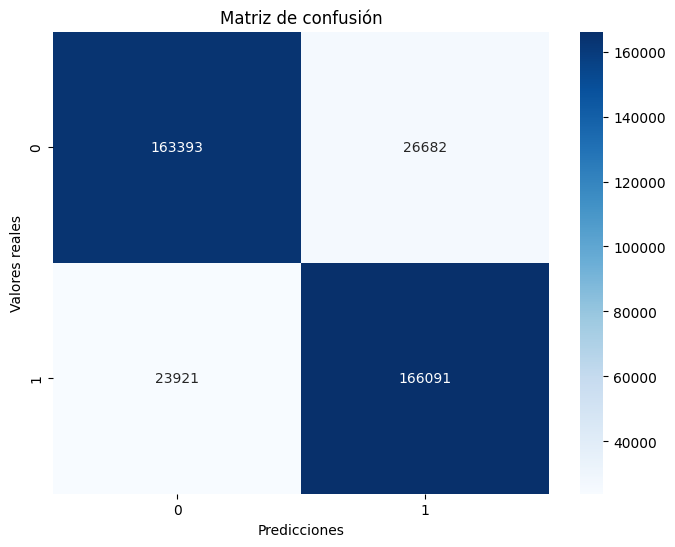

In [20]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test_smote, y_pred_smote)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()


## SUBMUESTREO

In [21]:
# Dvidimos en clase mayoritaria y minoritaria
clase_mayoritaria = df_covid[df_covid['fallecidos'] == 0]
clase_minoritaria = df_covid[df_covid['fallecidos'] == 1]

# downsampling de la clase mayoritaria
clase_mayoritarial_downsampled = resample(clase_mayoritaria,
                                            replace = False,
                                            n_samples = len(clase_minoritaria),
                                            random_state = 42)

df_covid_downsampled = pd.concat([clase_mayoritarial_downsampled, clase_minoritaria])

df_covid_downsampled['fallecidos'].value_counts()

# creamos el modelo de clasificacion
X = df_covid_downsampled.drop('fallecidos', axis=1)
y = df_covid_downsampled['fallecidos']


# dividimos el dataset en train y test
X_train, X_test_resample, y_train, y_test_resample = train_test_split(X, y, test_size=0.2, random_state=42)




In [22]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_resample = scaler.transform(X_test_resample)

# red neuronal entrenar
model_resample = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_resample.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_resample.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test_resample, y_test_resample))

#evaluamos el modelo
loss_resample, accuracy_resample = model_resample.evaluate(X_test_resample, y_test_resample)
print('Loss:', loss_resample)
print('Accuracy:', accuracy_resample)

# Obtener las predicciones del modelo
y_pred_resample = model_resample.predict(X_test_resample)
y_pred_resample = (y_pred_resample > 0.5).astype(int)

precision_resample = precision_score(y_test_resample, y_pred_resample)
recall_resample = recall_score(y_test_resample, y_pred_resample)
f1_resample = f1_score(y_test_resample, y_pred_resample)

print('Precision:', precision_resample)
print('Recall:', recall_resample)
print('F1:', f1_resample)



Epoch 1/10
 670/3731 [====>.........................] - ETA: 3s - loss: 0.3735 - accuracy: 0.8447

3731/3731 [==============================] - 5s 1ms/step - loss: 0.3545 - accuracy: 0.8535 - val_loss: 0.3507 - val_accuracy: 0.8549
Epoch 2/10
3731/3731 [==============================] - 4s 1ms/step - loss: 0.3482 - accuracy: 0.8563 - val_loss: 0.3477 - val_accuracy: 0.8554
Epoch 3/10
3731/3731 [==============================] - 4s 1ms/step - loss: 0.3472 - accuracy: 0.8561 - val_loss: 0.3473 - val_accuracy: 0.8551
Epoch 4/10
3731/3731 [==============================] - 4s 1ms/step - loss: 0.3466 - accuracy: 0.8566 - val_loss: 0.3473 - val_accuracy: 0.8544
Epoch 5/10
3731/3731 [==============================] - 4s 990us/step - loss: 0.3459 - accuracy: 0.8568 - val_loss: 0.3477 - val_accuracy: 0.8553
Epoch 6/10
3731/3731 [==============================] - 4s 1ms/step - loss: 0.3456 - accuracy: 0.8567 - val_loss: 0.3474 - val_accuracy: 0.8546
Epoch 7/10
3731/3731 [==============================] - 4s 1ms/step - loss: 0.3453 - accuracy: 0.8569 - val_loss: 0.3465 - val_accuracy: 0.8552
E

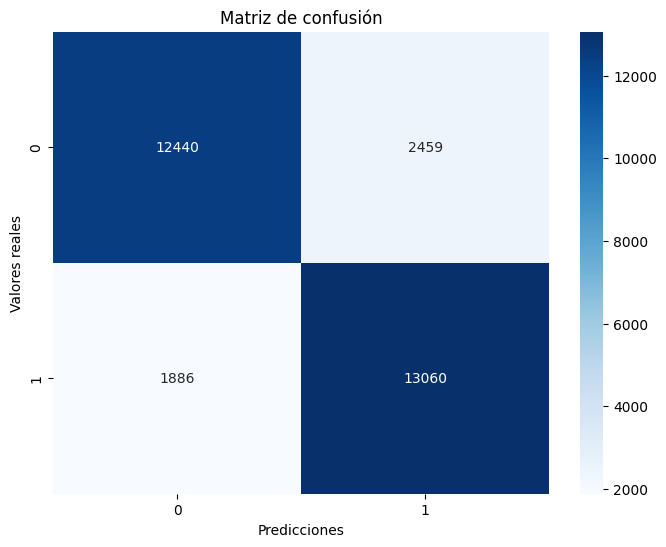

In [23]:


# Calcular la matriz de confusión
cm = confusion_matrix(y_test_resample, y_pred_resample)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

## Combinado smote-enn

In [24]:
# # Dvidimos en clase mayoritaria y minoritaria
# clase_mayoritaria = df_covid[df_covid['fallecidos'] == 0]
# clase_minoritaria = df_covid[df_covid['fallecidos'] == 1]

# X = df_covid.drop('fallecidos', axis=1)
# y = df_covid['fallecidos']

# # Aplico smote-enn
# smote_enn = SMOTEENN(random_state=101)

# X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# # creo el dataframe con los datos balanceados
# df_covid_balanceado = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# # creamos el modelo de clasificacion
# X = df_covid_balanceado.drop('fallecidos', axis=1)
# y = df_covid_balanceado['fallecidos']


# # dividimos el dataset en train y test
# X_train, X_test_enn, y_train, y_test_enn = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
df_covid_balanceado = pd.read_csv('df_covid_balanceado.csv')

# creamos el modelo de clasificacion
X = df_covid_balanceado.drop('fallecidos', axis=1)
y = df_covid_balanceado['fallecidos']


# dividimos el dataset en train y test
X_train, X_test_enn, y_train, y_test_enn = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_enn = scaler.transform(X_test_enn)
# red neuronal entrenar

model_enn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_enn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_enn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test_enn, y_test_enn))


Epoch 1/10
28144/28144 [==============================] - 30s 1ms/step - loss: 0.0917 - accuracy: 0.9684 - val_loss: 0.0812 - val_accuracy: 0.9707
Epoch 2/10
28144/28144 [==============================] - 29s 1ms/step - loss: 0.0733 - accuracy: 0.9738 - val_loss: 0.0702 - val_accuracy: 0.9752
Epoch 3/10
28144/28144 [==============================] - 31s 1ms/step - loss: 0.0673 - accuracy: 0.9762 - val_loss: 0.0672 - val_accuracy: 0.9756
Epoch 4/10
28144/28144 [==============================] - 26s 928us/step - loss: 0.0639 - accuracy: 0.9775 - val_loss: 0.0632 - val_accuracy: 0.9782
Epoch 5/10
28144/28144 [==============================] - 26s 908us/step - loss: 0.0611 - accuracy: 0.9784 - val_loss: 0.0623 - val_accuracy: 0.9788
Epoch 6/10
28144/28144 [==============================] - 26s 907us/step - loss: 0.0593 - accuracy: 0.9792 - val_loss: 0.0596 - val_accuracy: 0.9793
Epoch 7/10
28144/28144 [==============================] - 26s 919us/step - loss: 0.0578 - accuracy: 0.9797 - val

In [27]:
#evaluamos el modelo
loss_enn, accuracy_enn = model_enn.evaluate(X_test_enn, y_test_enn)
print('Loss:', loss_enn)
print('Accuracy:', accuracy_enn)

# Obtener las predicciones del modelo
y_pred_enn = model_enn.predict(X_test_enn)
y_pred_enn = (y_pred_enn > 0.5).astype(int)

precision_enn = precision_score(y_test_enn, y_pred_enn)
recall_enn = recall_score(y_test_enn, y_pred_enn)
f1_enn = f1_score(y_test_enn, y_pred_enn)

print('Precision:', precision_enn)
print('Recall:', recall_enn)
print('F1:', f1_enn)

7036/7036 [==============================] - 5s 681us/step - loss: 0.0556 - accuracy: 0.9799
Loss: 0.05562357231974602
Accuracy: 0.979924201965332
7036/7036 [==============================] - 4s 589us/step
Precision: 0.9695623542017792
Recall: 0.9797764468356286
F1: 0.974642640755784


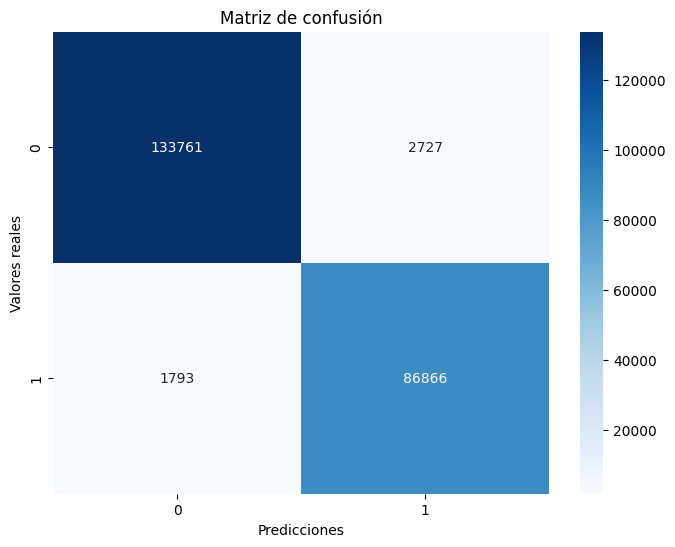

In [28]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test_enn, y_pred_enn)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

## COMBINADO OVER Y UNDER SAMPLING

In [29]:
X = df_covid.drop('fallecidos', axis=1)
y = df_covid['fallecidos']

oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)

undersampler = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X_over, y_over)

# nuevo dataset balanceado

df_balanceado = pd.concat([X_balanced, y_balanced], axis=1)

df_balanceado.value_counts('fallecidos')

fallecidos
0    950217
1    950217
Name: count, dtype: int64

In [30]:
# creamos el modelo de clasificacion

X = df_balanceado.drop('fallecidos', axis=1)
y = df_balanceado['fallecidos']


In [31]:
# dividimos el dataset en train y test

X_train, X_test_ou, y_train, y_test_ou = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_ou = scaler.transform(X_test_ou)

# red neuronal entrenar
model_ou = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_ou.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_ou.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test_ou, y_test_ou))

Epoch 1/10
47511/47511 [==============================] - 48s 997us/step - loss: 0.3475 - accuracy: 0.8562 - val_loss: 0.3444 - val_accuracy: 0.8578
Epoch 2/10
47511/47511 [==============================] - 47s 988us/step - loss: 0.3456 - accuracy: 0.8569 - val_loss: 0.3443 - val_accuracy: 0.8575
Epoch 3/10
47511/47511 [==============================] - 47s 994us/step - loss: 0.3452 - accuracy: 0.8572 - val_loss: 0.3441 - val_accuracy: 0.8578
Epoch 4/10
47511/47511 [==============================] - 47s 989us/step - loss: 0.3449 - accuracy: 0.8572 - val_loss: 0.3434 - val_accuracy: 0.8581
Epoch 5/10
47511/47511 [==============================] - 48s 1ms/step - loss: 0.3447 - accuracy: 0.8573 - val_loss: 0.3442 - val_accuracy: 0.8581
Epoch 6/10
47511/47511 [==============================] - 48s 1ms/step - loss: 0.3445 - accuracy: 0.8573 - val_loss: 0.3434 - val_accuracy: 0.8580
Epoch 7/10
47511/47511 [==============================] - 47s 987us/step - loss: 0.3444 - accuracy: 0.8575 - v

In [33]:
#evaluamos el modelo
loss_ou, accuracy_ou = model_ou.evaluate(X_test_ou, y_test_ou)
print('Loss:', loss_ou)
print('Accuracy:', accuracy_ou)

# Obtener las predicciones del modelo
y_pred_ou = model_ou.predict(X_test_ou)
y_pred_ou = (y_pred_ou > 0.5).astype(int)

precision_ou = precision_score(y_test_ou, y_pred_ou)
recall_ou = recall_score(y_test_ou, y_pred_ou)
f1_ou = f1_score(y_test_ou, y_pred_ou)

print('Precision:', precision_ou)
print('Recall:', recall_ou)
print('F1:', f1_ou)



11878/11878 [==============================] - 8s 701us/step - loss: 0.3430 - accuracy: 0.8580
Loss: 0.34295859932899475
Accuracy: 0.8580403923988342
11878/11878 [==============================] - 7s 588us/step
Precision: 0.8479226401304324
Recall: 0.8726907377014687
F1: 0.8601284214837684


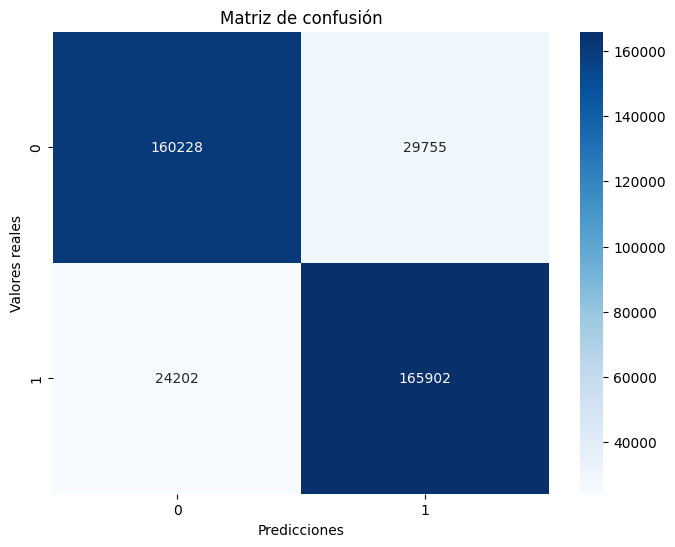

In [34]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test_ou, y_pred_ou)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

## Grafioc de curvas de precision-recall

## Imprimo todas las metricas

In [35]:
# hago una tabla con los resultados de los modelos

resultados = pd.DataFrame({'Modelo': ['Modelo Base', 'Modelo Smote', 'Modelo Resample', 'Modelo ENN', 'Modelo Over Under'],
                            'Accuracy': [accuracy, accuracy_smote, accuracy_resample, accuracy_enn, accuracy_ou],
                            'Precision': [precision, precision_smote, precision_resample, precision_enn, precision_ou],
                            'Recall': [recall, recall_smote, recall_resample, recall_enn, recall_ou],
                            'F1': [f1, f1_smote, f1_resample, f1_enn, f1_ou],
                            'Loss': [loss, loss_smote, loss_resample, loss_enn, loss_ou]})
resultados


,Modelo,Accuracy,Precision,Recall,F1,Loss
0,Modelo Base,0.933028,0.552152,0.359791,0.435683,0.156481
1,Modelo Smote,0.866865,0.861589,0.874108,0.867803,0.320178
2,Modelo Resample,0.854414,0.841549,0.873812,0.857377,0.346908
3,Modelo ENN,0.979924,0.969562,0.979776,0.974643,0.055624
4,Modelo Over Under,0.858040,0.847923,0.872691,0.860128,0.342959


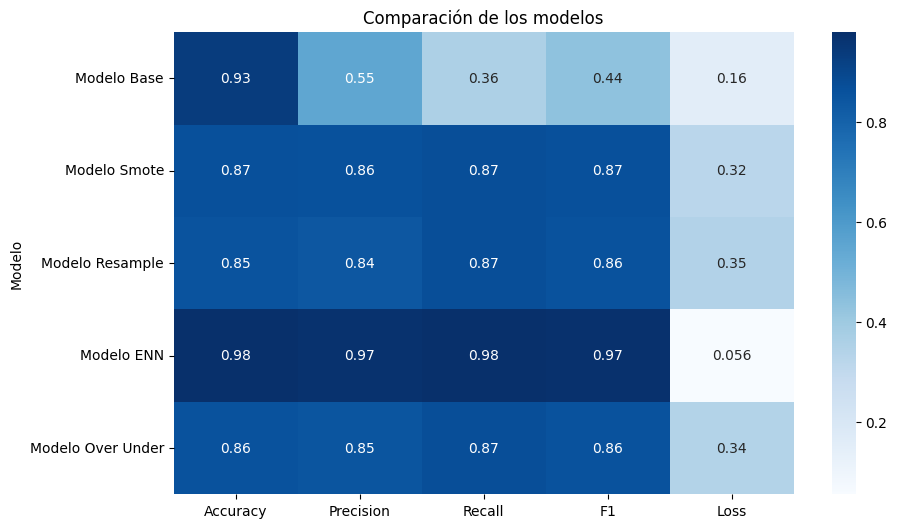

In [36]:
# mapa de calor de los resultados

plt.figure(figsize=(10, 6))
sns.heatmap(resultados.set_index('Modelo'), annot=True, cmap='Blues')
plt.title('Comparación de los modelos')

plt.show()


# Grafico de curvas ROC

11878/11878 [==============================] - 8s 647us/step


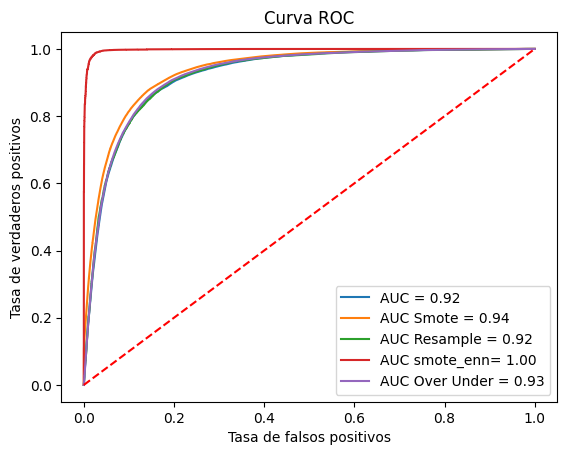

In [37]:
# comparacion de los modelos

# grafico todas las curvas ROC en un solo grafico
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

y_pred_smote = model_smote.predict(X_test_smote)
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test_smote, y_pred_smote)
auc_smote = roc_auc_score(y_test_smote, y_pred_smote)

y_pred_resample = model_resample.predict(X_test_resample)
fpr_resample, tpr_resample, thresholds_resample = roc_curve(y_test_resample, y_pred_resample)
auc_resample = roc_auc_score(y_test_resample, y_pred_resample)

y_pred_enn = model_enn.predict(X_test_enn)
fpr_enn, tpr_enn, thresholds_enn = roc_curve(y_test_enn, y_pred_enn)
auc_enn = roc_auc_score(y_test_enn, y_pred_enn)

y_pred_ou = model_ou.predict(X_test_ou)
fpr_ou, tpr_ou, thresholds_ou = roc_curve(y_test_ou, y_pred_ou)
auc_ou = roc_auc_score(y_test_ou, y_pred_ou)


plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot(fpr_smote, tpr_smote, label=f'AUC Smote = {auc_smote:.2f}')
plt.plot(fpr_resample, tpr_resample, label=f'AUC Resample = {auc_resample:.2f}')
plt.plot(fpr_enn, tpr_enn, label=f'AUC smote_enn= {auc_enn:.2f}')
plt.plot(fpr_ou, tpr_ou, label=f'AUC Over Under = {auc_ou:.2f}')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')

plt.legend()

plt.show()

11878/11878 [==============================] - 7s 621us/step


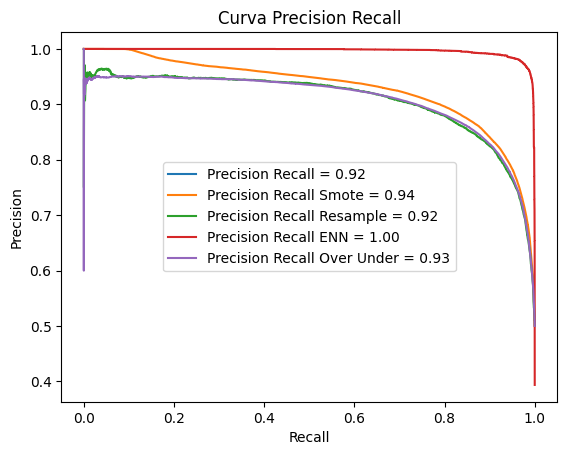

In [38]:
# saco los recall y precision para graficar
y_pred = model.predict(X_test)
precision_original, recall_original, tresholds_original = precision_recall_curve(y_test, y_pred)

y_pred_smote = model_smote.predict(X_test_smote)
precision_smote, recall_smote, tresholds_smote = precision_recall_curve(y_test_smote, y_pred_smote)

y_pred_resample = model_resample.predict(X_test_resample)
precision_resample, recall_resample, tresholds_resample = precision_recall_curve(y_test_resample, y_pred_resample)

y_pred_enn = model_enn.predict(X_test_enn)
precision_enn, recall_enn, tresholds_enn = precision_recall_curve(y_test_enn, y_pred_enn)

y_pred_ou = model_ou.predict(X_test_ou)
precision_ou, recall_ou, tresholds_ou = precision_recall_curve(y_test_ou, y_pred_ou)



# grafico todas las curvas precision recall en un solo grafico
plt.plot(recall, precision, label=f'Precision Recall = {auc:.2f}')
plt.plot(recall_smote, precision_smote, label=f'Precision Recall Smote = {auc_smote:.2f}')
plt.plot(recall_resample, precision_resample, label=f'Precision Recall Resample = {auc_resample:.2f}')
plt.plot(recall_enn, precision_enn, label=f'Precision Recall ENN = {auc_enn:.2f}')
plt.plot(recall_ou, precision_ou, label=f'Precision Recall Over Under = {auc_ou:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision Recall')

plt.legend()

